In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [22]:
conn = psycopg2.connect(host="localhost",database="mimic", user="postgres", password='postgres', port = '5432')
cursor = conn.cursor()

In [27]:
# explore fluid input and echo
sql = """
SELECT *
  FROM mimiciii.test_echo_fluid
  """
df = pd.read_sql_query(sql, conn)

In [28]:
df.describe()

,subject_id,pulmhtn,dm,esrd,isdead,age_of_death,days_after_icu_admit_death,days_after_discharge_death,tv_pulm_htn,tv_tr,...,lv_diastolic,lv_systolic,lv_wall,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall,daily_input_ml,daily_output_ml,daily_balance_ml
count,3816.000000,3816.000000,3816.000000,3816.0,3816.000000,838.000000,838.000000,838.000000,674.000000,3462.000000,...,198.000000,3280.000000,2950.000000,3408.000000,42.0,3564.000000,174.000000,3816.000000,3812.000000,3812.000000
mean,46262.449686,0.038260,0.285115,0.0,0.219602,74.935561,385.372315,377.451074,0.854599,-0.054304,...,-1.121212,-0.105488,0.157288,-0.045775,1.0,-0.011223,0.241379,3920.819241,2279.035677,1643.709923
std,28759.948606,0.191848,0.451529,0.0,0.414031,51.921576,597.711342,597.954809,0.868596,5.313348,...,8.676092,3.756280,3.990792,3.236535,0.0,2.402611,0.429155,2518.980175,1290.193952,2575.305986
min,36.000000,0.000000,0.000000,0.0,0.000000,18.000000,0.000000,-4.000000,0.000000,-50.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,1.0,-50.000000,0.000000,0.000000,0.000000,-7750.000000
25%,22543.000000,0.000000,0.000000,0.0,0.000000,54.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2229.426148,1395.000000,17.022854
50%,43740.500000,0.000000,0.000000,0.0,0.000000,68.000000,67.000000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,3527.938542,2090.000000,1389.206841
75%,70469.750000,0.000000,1.000000,0.0,0.000000,79.000000,545.250000,538.750000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,5200.258309,2850.000000,2838.500000
max,99922.000000,1.000000,1.000000,0.0,1.000000,309.000000,2956.000000,2952.000000,3.000000,3.000000,...,1.000000,3.000000,3.000000,2.000000,1.0,3.000000,1.000000,23322.959261,10520.000000,18224.959261


# lv_systolic = 3 means severely depression LV ejection fraction (<30%)

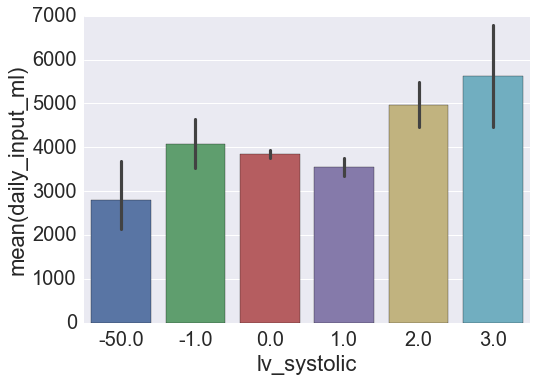

In [29]:
sns.set(font_scale=2)
sns.barplot(x="lv_systolic", y="daily_input_ml", data=df)

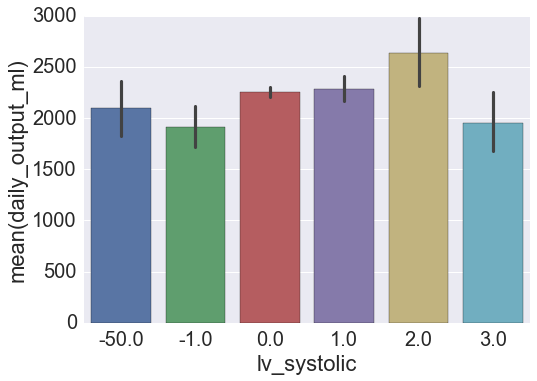

In [30]:
sns.barplot(x="lv_systolic", y="daily_output_ml", data=df)

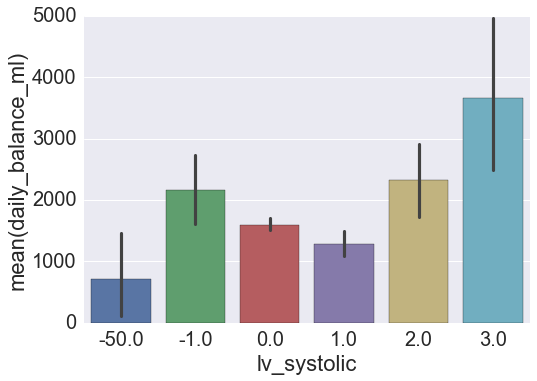

In [26]:
sns.barplot(x="lv_systolic", y="daily_balance_ml", data=df)

# lv_dialystolic = 1 means LV diastolic dysfunction

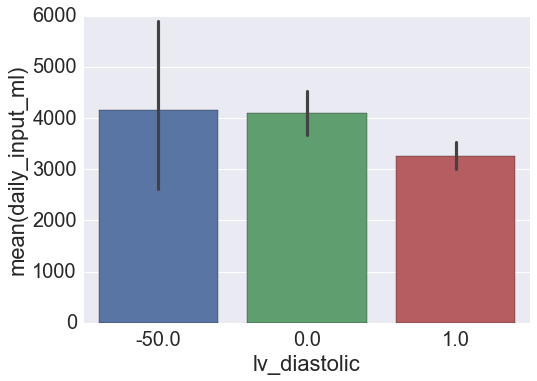

In [15]:
sns.barplot(x="lv_diastolic", y="daily_input_ml", data=df)

In [11]:
df.columns

Index([u'subject_id', u'charttime', u'echo_chartdate', u'ea_chartdate',
       u'pulmhtn', u'dm', u'esrd', u'isdead', u'age_of_death',
       u'days_after_icu_admit_death', u'days_after_discharge_death', u'status',
       u'tv_pulm_htn', u'tv_tr', u'lv_cavity', u'lv_diastolic', u'lv_systolic',
       u'lv_wall', u'rv_cavity', u'rv_diastolic_fluid', u'rv_systolic',
       u'rv_wall', u'daily_input_ml', u'daily_output_ml', u'daily_balance_ml'],
      dtype='object')

# rv_systolic = 3 means severe RV wall hypokinesis

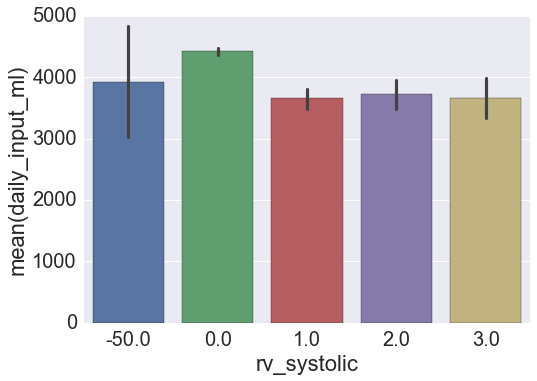

In [16]:
sns.barplot(x="rv_systolic", y="daily_input_ml", data=df)

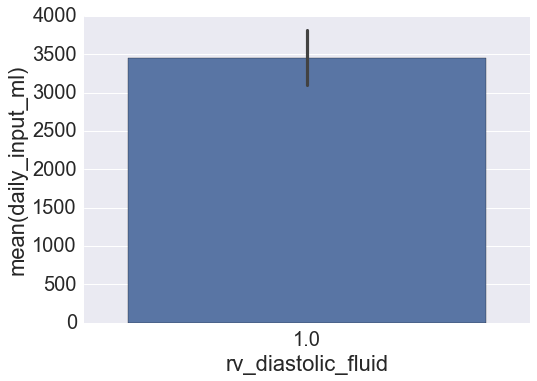

In [18]:
sns.barplot(x="rv_diastolic_fluid", y="daily_input_ml", data=df)

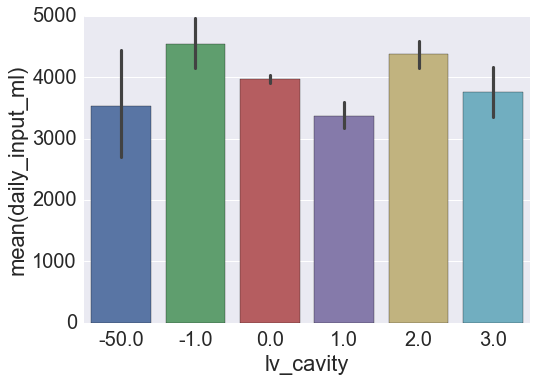

In [20]:
sns.barplot(x="lv_cavity", y="daily_input_ml", data=df)

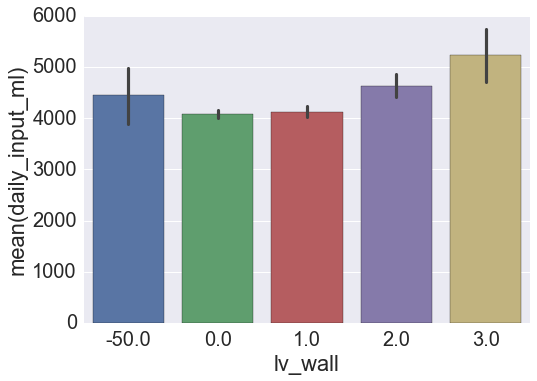

In [21]:
sns.barplot(x="lv_wall", y="daily_input_ml", data=df)

In [31]:
# explore fluid input and echo
sql = """
SELECT *
  FROM mimiciii.test_echo_fluid2
  """
df = pd.read_sql_query(sql, conn)

In [32]:
df.head()

,row_id,charttime,icustay_id,hadm_id,subject_id,intime,outtime,intime_to_echo,echo_to_outtime,ps_vaso,...,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall,time_filter,age_filter,day_wrt_echo,daily_input_ml,daily_output_ml,daily_balance_ml
0,67805,2131-05-04 10:41:00,280987,182104,36,2131-05-04 10:29:14,2131-05-05 13:07:03,00:11:46,1 days 02:26:03,True,...,0.0,NaN,0.0,NaN,True,True,0,3001.0,1885.0,1116.0
1,67805,2131-05-04 10:41:00,280987,182104,36,2131-05-04 10:29:14,2131-05-05 13:07:03,00:11:46,1 days 02:26:03,True,...,0.0,NaN,0.0,NaN,True,True,1,508.0,1201.0,-693.0
2,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,16:59:16,2 days 02:49:46,True,...,0.0,NaN,0.0,NaN,True,True,0,2781.0,823.0,1958.0
3,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,16:59:16,2 days 02:49:46,True,...,0.0,NaN,0.0,NaN,True,True,1,505.0,1525.0,-1020.0
4,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,16:59:16,2 days 02:49:46,True,...,0.0,NaN,0.0,NaN,True,True,2,335.5,730.0,-394.5


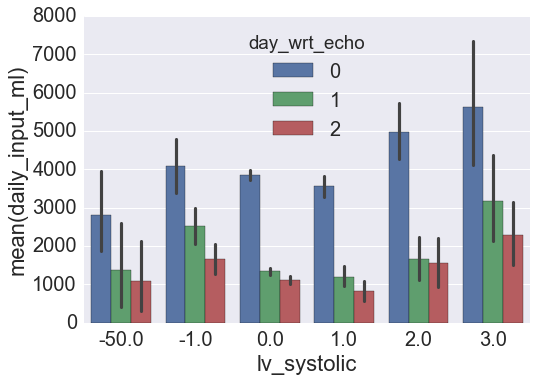

In [43]:
# for echos at ICU start, looking at fluid input post echo day 0, 1, and 2
# we can see that day 0 has the greatest fluid input, most likely for resuscitation
# patients with LV systolic dysfunction are getting more fluid input... could be due to confounding factor
# perhaps patients with more LV systolic dysfunction are sicker and require more fluids. adjust with APACHE??
sns.barplot(x="lv_systolic", y="daily_input_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])

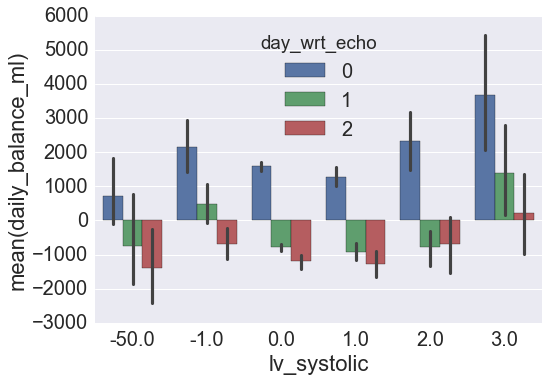

In [44]:
sns.barplot(x="lv_systolic", y="daily_balance_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])

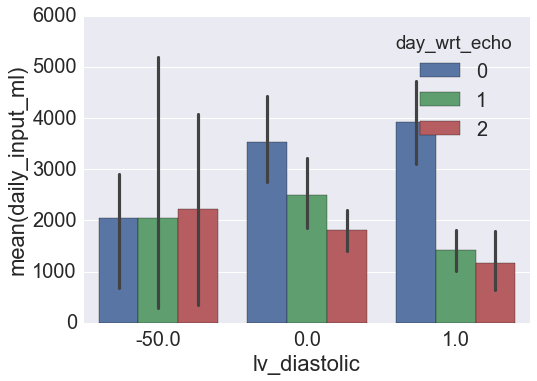

In [48]:
sns.barplot(x="lv_diastolic", y="daily_input_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])